<a href="https://colab.research.google.com/github/arizonaCameraLab/computationalImaging/blob/master/Chapter2ForwardModels/Numerical_Calculation_of_the_prolate_spheriodal_eigenvalues_%CE%BB_n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Eigenvalues of Prolate Spheriodal functions

## David Brady
## Fall 2025

This notebook evaluates eigenvalues for prolate spheroidal functions using the scipy function pro_ang1

This notebook was created with help from Google Gemini.


The eigenvalues are estimated using the identity, setting `X=1` and `B=c` (the spheroidal parameter):

$$\int_{-1}^{1} \psi_n(x) e^{2\pi i u x} dx = i^n \sqrt{\frac{\lambda_n}{c}} \psi_n\left(\frac{u}{c}\right)$$

For the **even `n`** case, the calculation is simple. We can just set `u = 0`:

* The left side becomes: `∫ ψ_n(x) dx`
* The right side becomes: `i^n √(λ_n/c) * ψ_n(0)`

Since `ψ_n(x)` is non-zero at the origin for even `n`, we can solve this equation for `λ_n`.

However, for **odd `n`**, this direct approach fails. This is because `pro_ang1` (our `ψ_n`) is an **odd function** when `n` is odd. Odd functions have two key properties that are relevant here:
1.  They are zero at the origin: `ψ_n(0) = 0`.
2.  Their integral over a symmetric interval is zero: `∫[-1, 1] ψ_n(x) dx = 0`.

If we try to set `u=0` in the identity for odd `n`, we get:

$$\underbrace{\int_{-1}^{1} \psi_n(x) dx}_{\text{This is 0}} = i^n \sqrt{\frac{\lambda_n}{c}} \underbrace{\psi_n(0)}_{\text{This is 0}}$$

This simplifies to the unhelpful equation `0 = 0`, and we can't solve for `λ_n`.

To get around the `0 = 0` problem, we use a standard calculus technique: **we differentiate both sides of the identity with respect to `u` *before* we set `u` to zero.** This will give us a new, valid equation that we can solve.

#### **Step A: Differentiate the Left-Hand Side (LHS)**

$$\frac{d}{du} \left[ \int_{-1}^{1} \psi_n(x) e^{2\pi i u x} dx \right]$$

We can bring the derivative inside the integral:

$$\int_{-1}^{1} \psi_n(x) \frac{d}{du} \left( e^{2\pi i u x} \right) dx = \int_{-1}^{1} \psi_n(x) (2\pi i x) e^{2\pi i u x} dx$$

Now, setting `u = 0`, the exponential term becomes 1, and we are left with:

$$2\pi i \int_{-1}^{1} x \psi_n(x) dx$$

Notice that this is exactly the integral that appears in the code for the odd `n` case: `integral_val`.

#### **Step B: Differentiate the Right-Hand Side (RHS)**

$$\frac{d}{du} \left[ i^n \sqrt{\frac{\lambda_n}{c}} \psi_n\left(\frac{u}{c}\right) \right]$$

The `i^n` and the square root are constants with respect to `u`. We use the chain rule to differentiate `ψ_n(u/c)`:

$$i^n \sqrt{\frac{\lambda_n}{c}} \left[ \psi'_n\left(\frac{u}{c}\right) \cdot \frac{1}{c} \right]$$

Now, setting `u = 0`, we get:

$$\frac{i^n}{c} \sqrt{\frac{\lambda_n}{c}} \psi'_n(0)$$

Notice that this expression involves the **derivative** of the function at the origin, `ψ'_n(0)`. For an odd function, this derivative is generally non-zero, which is key to solving the problem. This is the `psi_prime_at_zero` term in the code.

### 3. The Final Calculation

By equating the results from Step A and Step B, we get a new equation that is valid for odd `n`:

$$2\pi i \int_{-1}^{1} x \psi_n(x) dx = \frac{i^n}{c} \sqrt{\frac{\lambda_n}{c}} \psi'_n(0)$$

This equation can now be algebraically rearranged to solve for `λ_n`, because neither side is zero. This is precisely what the code implements to find the eigenvalue for odd values of `n`.

Calculating and plotting lambda_n for c = 4.0

------------------------------
n    lambda_n            
------------------------------
0    0.9958854904        
1    0.9121074241        
2    0.5190548375        
3    0.1102109870        
4    0.0088278764        
5    0.0003812917        
6    0.0000109509        
7    0.0000002279        
8    0.0000000036        
9    0.0000000000        
10   0.0000000000        
11   0.0000000000        
12   0.0000000000        
13   0.0000000000        
14   0.0000000000        
------------------------------


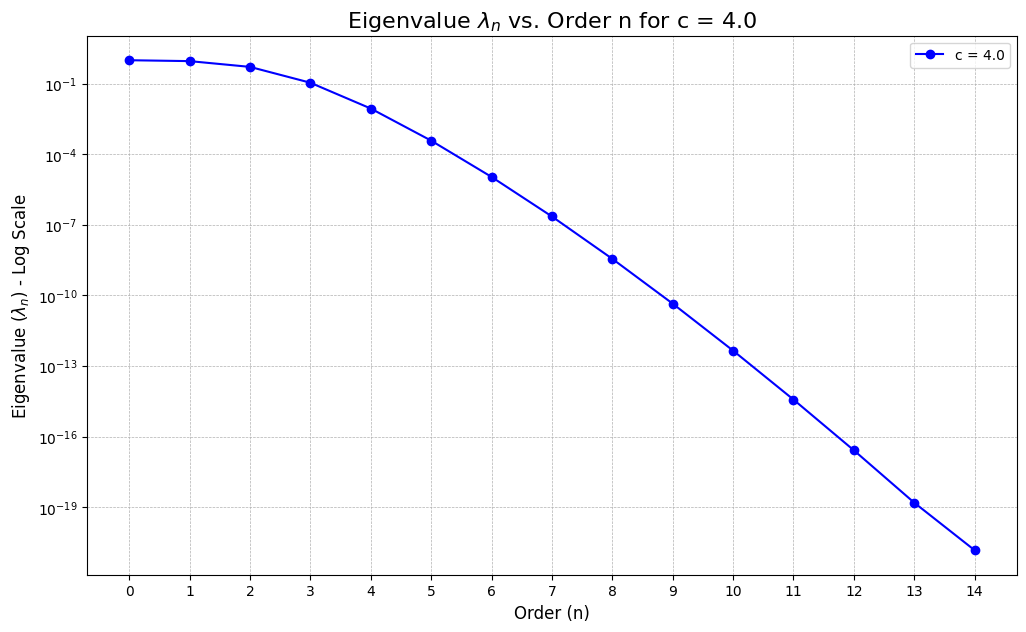

In [1]:
import numpy as np
from scipy.special import pro_ang1
from scipy.integrate import quad
import matplotlib.pyplot as plt

def calculate_lambda_n(n, c):
    """
    Numerically calculates the eigenvalue lambda_n for the prolate spheroidal
    angular function pro_ang1(m=0, n, c, x) using the finite Fourier
    transform identity.

    Args:
        n (int): The order of the function (n >= m=0).
        c (float): The spheroidal parameter.

    Returns:
        float: The calculated eigenvalue lambda_n.
    """
    # The eigenvalue lambda_n in this context is associated with the finite
    # Fourier transform operator. It is related to, but distinct from,
    # the energy concentration ratio (the integral of the squared function).

    if n % 2 == 0:  # Case for even n
        # For even n, we can evaluate the identity at u=0, which simplifies it.
        # The function is non-zero at the origin.

        # 1. Calculate the integral of the function from -1 to 1.
        integrand_even = lambda x: pro_ang1(0, n, c, x)[0]
        integral_val, _ = quad(integrand_even, -1, 1)

        # 2. Get the value of the function at x=0.
        psi_at_zero = pro_ang1(0, n, c, 0)[0]

        # 3. Handle the case where psi_at_zero is close to zero to avoid division errors.
        if np.isclose(psi_at_zero, 0):
            return np.nan # Should not happen for even n, but good practice.

        # 4. Calculate lambda_n from the rearranged identity for even n.
        # The i^n term squares to 1 for even n.
        term_in_brackets = integral_val / psi_at_zero
        lambda_n = (c / (2 * np.pi)) * (term_in_brackets ** 2)

    else:  # Case for odd n
        # For odd n, the function is zero at the origin, so we use a method
        # based on the derivative of the identity at u=0.

        # 1. Calculate the integral of x * psi_n(x) from -1 to 1.
        integrand_odd = lambda x: x * pro_ang1(0, n, c, x)[0]
        integral_val, _ = quad(integrand_odd, -1, 1)

        # 2. Get the value of the function's derivative at x=0.
        psi_prime_at_zero = pro_ang1(0, n, c, 0)[1]

        # 3. Handle the case where the derivative is close to zero.
        if np.isclose(psi_prime_at_zero, 0):
            return np.nan

        # 4. Calculate lambda_n from the rearranged identity for odd n.
        # The i^(n-1) term squares to 1 for odd n.
        term_in_brackets = (c * integral_val) / psi_prime_at_zero
        lambda_n = (c / (2 * np.pi)) * (term_in_brackets ** 2)

    return lambda_n

# --- Example Usage and Plotting ---
if __name__ == "__main__":
    # Set the spheroidal parameter c
    c_param = 4.0
    # Set the range of n values to calculate and plot
    n_range = np.arange(0, 15)

    # Calculate lambda_n for each value of n
    lambda_values = [calculate_lambda_n(n, c_param) for n in n_range]

    # Print the results
    print(f"Calculating and plotting lambda_n for c = {c_param}\n")
    print("-" * 30)
    print(f"{'n':<5}{'lambda_n':<20}")
    print("-" * 30)
    for n_val, lambda_val in zip(n_range, lambda_values):
        print(f"{n_val:<5}{lambda_val:<20.10f}")
    print("-" * 30)

    # Create the plot
    plt.figure(figsize=(12, 7))
    plt.plot(n_range, lambda_values, marker='o', linestyle='-', color='b', label=f'c = {c_param}')
    plt.title(f'Eigenvalue $\\lambda_n$ vs. Order n for c = {c_param}', fontsize=16)
    plt.xlabel('Order (n)', fontsize=12)
    plt.ylabel('Eigenvalue ($\\lambda_n$)', fontsize=12)
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.xticks(n_range)
    plt.legend()
    plt.yscale('log')
    plt.ylabel('Eigenvalue ($\\lambda_n$) - Log Scale', fontsize=12)
    plt.show()